In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df = pd.read_csv("/content/voice.csv")

In [123]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [124]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [126]:
df.loc[(df.label =="male"), 'label'] = '1'

In [127]:
df.loc[(df.label == "female"), 'label'] = '0'

In [128]:
df.label

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: object

<Axes: >

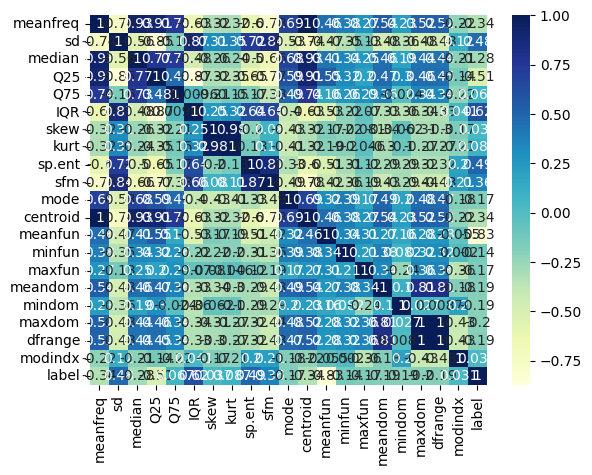

In [129]:
sns.heatmap(df.corr() , cmap = "YlGnBu" , annot = True)

In [130]:
X = df.drop(columns = "label")
Y = df.label

In [131]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , random_state = 2 , test_size = 0.2)

In [132]:
X_train

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1447,0.178306,0.062549,0.178832,0.136423,0.235547,0.099124,1.178621,4.001226,0.923416,0.448994,0.159927,0.178306,0.112051,0.047151,0.279070,0.947368,0.023438,5.390625,5.367188,0.117647
268,0.140897,0.073719,0.129847,0.089819,0.198187,0.108368,1.916411,7.175046,0.946765,0.649326,0.017183,0.140897,0.097979,0.023599,0.219178,0.158717,0.007812,0.492188,0.484375,0.301971
2681,0.197341,0.043190,0.195282,0.162256,0.224957,0.062701,2.258128,9.796196,0.872474,0.242700,0.158427,0.197341,0.164759,0.051780,0.277457,0.992365,0.023438,8.132812,8.109375,0.102568
1780,0.183046,0.031869,0.187398,0.172038,0.194420,0.022382,3.937859,20.365574,0.792733,0.216424,0.191348,0.183046,0.166264,0.027257,0.195122,0.235417,0.164062,0.867188,0.703125,0.149206
3093,0.160817,0.055693,0.164760,0.157396,0.188508,0.031111,7.035056,67.101169,0.876356,0.460015,0.162551,0.160817,0.157423,0.021505,0.188679,0.169020,0.161133,0.205078,0.043945,0.177778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,0.194937,0.034404,0.194902,0.181863,0.208971,0.027108,3.031623,13.742295,0.848110,0.254253,0.197647,0.194937,0.169901,0.051064,0.279070,2.174665,0.023438,13.265625,13.242188,0.106637
2347,0.225288,0.034083,0.228538,0.212735,0.247178,0.034443,2.113890,7.525178,0.846499,0.203654,0.215166,0.225288,0.166322,0.047666,0.271186,1.545410,0.023438,10.125000,10.101562,0.139000
1608,0.122706,0.085216,0.145739,0.032031,0.199123,0.167092,1.483382,4.788478,0.941022,0.620471,0.193518,0.122706,0.187219,0.032787,0.238806,0.610609,0.015625,3.773438,3.757812,0.190460
2541,0.197540,0.034775,0.198684,0.182661,0.218712,0.036052,2.459397,9.567449,0.839523,0.226977,0.185064,0.197540,0.173636,0.047013,0.271186,1.614746,0.210938,15.234375,15.023438,0.038962


In [133]:
X_test

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
218,0.163668,0.065648,0.157309,0.111623,0.220892,0.109268,2.303394,10.692241,0.940327,0.608047,0.220656,0.163668,0.107101,0.024615,0.175824,0.536892,0.007812,3.843750,3.835938,0.168564
1353,0.193317,0.060382,0.212397,0.142397,0.247877,0.105479,1.297583,4.304454,0.913325,0.416136,0.265137,0.193317,0.143739,0.047856,0.277457,0.880664,0.023438,6.023438,6.000000,0.116728
1999,0.175856,0.083800,0.198388,0.138163,0.237488,0.099325,4.330892,52.728075,0.941454,0.603737,0.000000,0.175856,0.186003,0.015936,0.271186,0.301563,0.007812,0.835938,0.828125,0.331490
1416,0.175803,0.059730,0.179281,0.137482,0.220072,0.082590,1.187303,4.747588,0.937132,0.495152,0.181799,0.175803,0.131686,0.048193,0.275862,0.982475,0.023438,4.335938,4.312500,0.166240
585,0.173095,0.078938,0.154168,0.124711,0.253585,0.128874,2.761376,13.616920,0.933829,0.562798,0.262230,0.173095,0.132628,0.053333,0.225352,0.427812,0.039062,0.914062,0.875000,0.282609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.133108,0.079635,0.128146,0.105080,0.183677,0.078596,24.018343,686.588177,0.875579,0.459351,0.000000,0.133108,0.090806,0.015656,0.258065,0.007812,0.007812,0.007812,0.000000,0.000000
2072,0.133659,0.077264,0.136636,0.071251,0.195638,0.124387,4.896853,68.847455,0.969887,0.778879,0.120419,0.133659,0.132471,0.015826,0.250000,0.222917,0.007812,0.710938,0.703125,0.268434
755,0.172391,0.061313,0.177512,0.114545,0.223062,0.108517,0.831556,3.405027,0.945400,0.505929,0.109633,0.172391,0.096195,0.018141,0.213333,0.593040,0.093750,3.757812,3.664062,0.231143
1944,0.195679,0.031613,0.193891,0.181785,0.211660,0.029874,3.189926,15.158649,0.850763,0.201765,0.193501,0.195679,0.183362,0.017778,0.250000,0.935397,0.187500,5.921875,5.734375,0.193079


In [134]:
Y_test

218     1
1353    1
1999    0
1416    1
585     1
       ..
530     1
2072    0
755     1
1944    0
2951    0
Name: label, Length: 634, dtype: object

In [135]:
# it is classification

In [136]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train , Y_train)

RandomForestClassifier()

In [137]:
model1_p = model1.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [139]:
model1_score = accuracy_score(Y_test , model1_p)

In [140]:
model1_score

0.9763406940063092

In [141]:
from sklearn.svm import SVC

In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
model2 = SVC()

In [144]:
model2 = SVC(random_state = 2)
model2.fit(X_train , Y_train)

SVC(random_state=2)

In [145]:
from sklearn.model_selection import cross_val_score
score2 = cross_val_score(model2 , X_train , Y_train , cv = 5)

In [146]:
score2

array([0.67850099, 0.7061144 , 0.65483235, 0.66863905, 0.65019763])

In [147]:
print("score of Train is: ",np.mean(score2))

score of Train is:  0.6716568826936721


In [148]:
print("score of Test is: " ,model2.score(X_test , Y_test))

score of Test is:  0.6545741324921136


<Axes: xlabel='meanfreq', ylabel='label'>

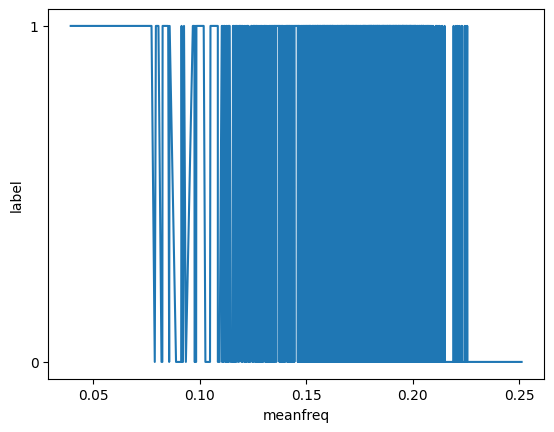

In [149]:
#مثلا در این نمودار سعی کرده ام مقادیر غیر نرمال سازی شده را با نمودار نشان دهم
data = sns.load_dataset("iris")
# draw lineplot
sns.lineplot(x=df["meanfreq"], y=df["label"], data=data)

In [150]:
sc = StandardScaler()

In [151]:
X_train = sc.fit_transform(X_train)

In [152]:
X_test = sc.fit_transform(X_test)

In [153]:
Y_test = sc.fit_transform(Y_test.values.reshape(-1 ,1))

In [154]:
Y_train = sc.fit_transform(Y_train.values.reshape(-1 ,1))

<Axes: >

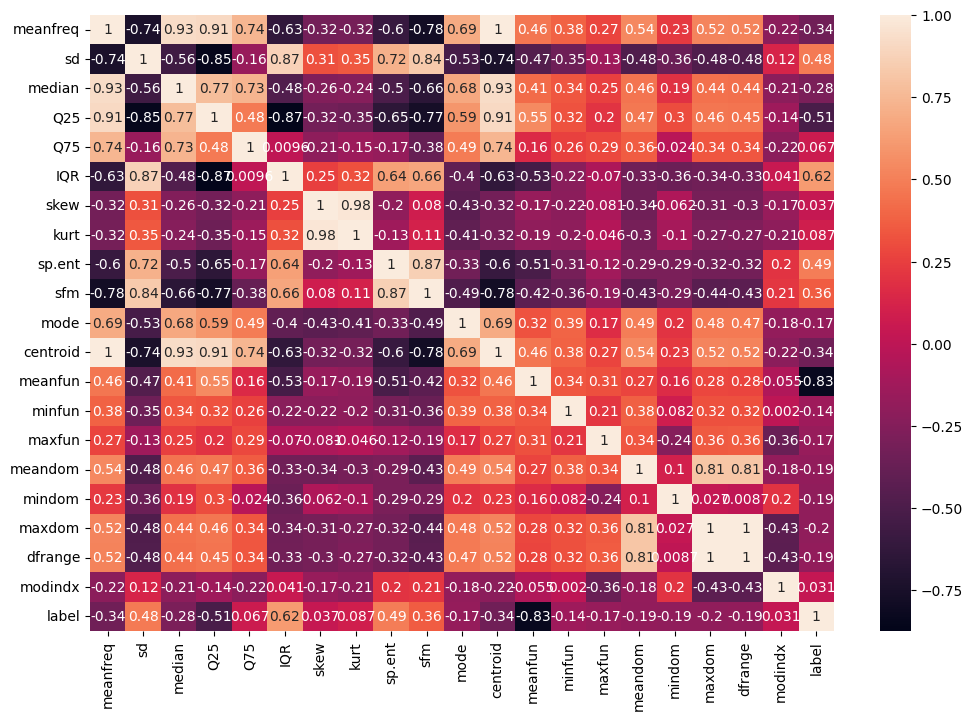

In [155]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr() , annot = True)

In [173]:
from sklearn.ensemble import RandomForestRegressor

In [174]:
model3 = RandomForestRegressor()

In [175]:
model3.fit(X_train,Y_train)

<ipython-input-175-beaaa84c06fd>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train,Y_train)


RandomForestRegressor()

In [176]:
model3_p = model3.predict(X_test)

In [177]:
model3_p

array([ 0.98356052,  0.90354953, -1.01671425,  0.98356052,  0.98356052,
       -1.01671425, -1.01671425, -0.85669227,  0.98356052,  0.98356052,
       -0.55665105,  0.98356052,  0.98356052, -0.9967115 ,  0.98356052,
       -0.9967115 ,  0.98356052, -0.9967115 , -0.73667578, -1.01671425,
        0.92355228, -1.01671425,  0.98356052,  0.98356052, -1.01671425,
       -1.01671425, -1.01671425, -1.01671425, -1.01671425,  0.96355778,
       -1.01671425,  0.98356052,  0.98356052, -1.01671425,  0.98356052,
       -1.01671425, -1.01671425,  0.98356052, -1.01671425,  0.98356052,
        0.18345061, -1.01671425,  0.98356052, -1.01671425, -1.01671425,
        0.98356052,  0.84354129, -1.01671425, -1.01671425, -1.01671425,
        0.94355503, -1.01671425, -0.1165906 , -0.29661533, -1.01671425,
       -1.01671425,  0.98356052,  0.98356052, -1.01671425,  0.98356052,
        0.98356052, -1.01671425, -0.97670875, -1.01671425,  0.92355228,
        0.74352755, -0.85669227, -1.01671425,  0.98356052,  0.98

In [179]:
model3_score = model3.score(X , Y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [180]:
model3_score

-3.875667247984784